In [18]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [19]:
SPY_data = pd.read_csv('../data/advanced/SPY_regression.csv')
SPY_data['Date'] = pd.to_datetime(SPY_data['Date'])
SPY_data.set_index('Date',inplace=True)

In [20]:
SPY_data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1493.000000,1493.000000,1493.000000,1493.000000,1.493000e+03,1493.000000
mean,1564.805712,1573.101540,1556.045962,1565.370924,3.778865e+09,1565.370924
std,344.474195,344.719565,344.233831,344.453792,8.865364e+08,344.453792
min,1027.650024,1032.949951,1010.909973,1022.580017,5.362000e+08,1022.580017
25%,1277.030029,1283.930054,1267.400024,1277.300049,3.252780e+09,1277.300049
50%,1459.369995,1462.430054,1452.060059,1459.369995,3.673450e+09,1459.369995
75%,1911.770020,1927.209961,1902.010010,1913.849976,4.214910e+09,1913.849976
max,2130.360107,2134.719971,2126.060059,2130.820068,1.061781e+10,2130.820068


# Feature Engineering
## 1. High – Low percent change

In [21]:
# (current - prior)/prior
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()

first = (2090.419922 -	2066.780029)
second = (2093.840088 -	2051.239990)
print(f'First : {first}, Second : {second}, Change : {(second-first)/first}')


## 2. 5 periods Exponential Moving Average

In [22]:
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)

## 3. Standard deviation of the price over the past 5 days

In [23]:
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window= 30).std().shift(periods=1)

## 4. Daily volume percent change

In [24]:
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()

## 5. Average volume for the past 5 days

In [25]:
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(center=False,window=5).mean().shift(periods=1)

## 6. Volume over close price ratio

In [26]:
SPY_data['volume Close'] = SPY_data["Volume"].rolling(center=False,window=5).std().shift(periods=1)

In [27]:
SPY_data.head(10)

,Open,High,Low,Close,Volume,Adj Close,High-Low_pct,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
Date,,,,,,,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,0.802043,2077.070068,NaN,0.042309,NaN,NaN
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,0.001172,2085.841992,NaN,0.021728,NaN,NaN
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN
2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912,-0.344421,2084.486090,NaN,0.143559,4.045596e+09,2.328943e+08
2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107,-0.316414,2082.996599,NaN,-0.654457,4.085838e+09,2.493154e+08
2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117,-0.268577,2085.515175,NaN,0.944957,3.536224e+09,1.181180e+09
2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893,2.556754,2086.678895,NaN,0.361729,3.245514e+09,1.121578e+09


# Visualize the correlation between the features and target variable

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

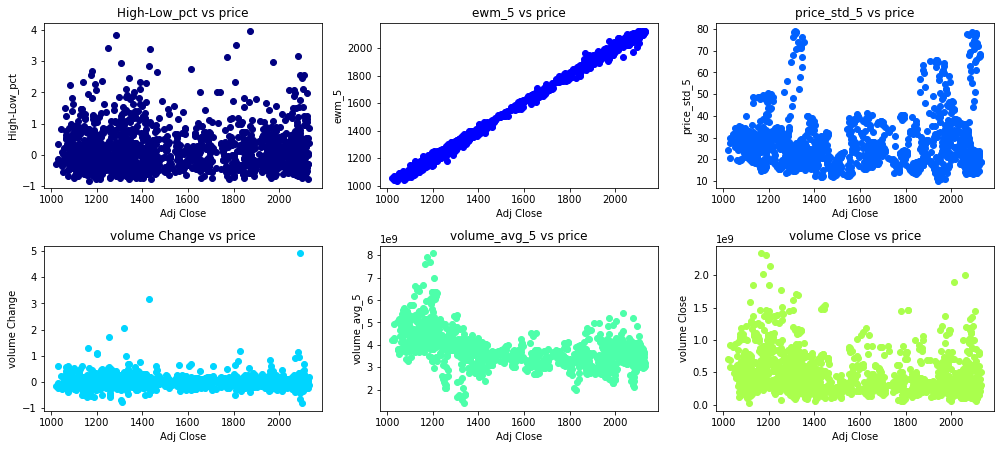

In [28]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def correlation(df,variables, n_rows, n_cols):
#     fig = plt.figure(figsize=(8,6))
    fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()
    
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = SPY_data.columns[-6:]
correlation(SPY_data,variables,3,3);

In [29]:
SPY_data.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64

In [30]:
SPY_data.isnull().sum().loc[variables]

High-Low_pct      1
ewm_5             1
price_std_5      30
volume Change     1
volume_avg_5      5
volume Close      5
dtype: int64

In [31]:
SPY_data = SPY_data.dropna(axis=0)

In [32]:
SPY_data.head(10)

,Open,High,Low,Close,Volume,Adj Close,High-Low_pct,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
Date,,,,,,,,,,,,
2015-10-23,2058.189941,2079.739990,2058.189941,2075.149902,4.108460e+09,2075.149902,1.502949,2078.965230,19.662414,0.213438,4.113186e+09,4.778334e+08
2015-10-22,2021.880005,2055.199951,2021.880005,2052.510010,4.430850e+09,2052.510010,0.546166,2077.693450,19.676415,0.078470,4.083638e+09,4.713022e+08
2015-10-21,2033.469971,2037.969971,2017.219971,2018.939941,3.627790e+09,2018.939941,-0.377250,2069.298950,20.183769,-0.181243,4.168020e+09,4.919039e+08
2015-10-20,2033.130005,2039.119995,2026.609985,2030.770020,3.331500e+09,2030.770020,-0.397108,2052.512588,22.378095,-0.081672,3.953956e+09,4.329012e+08
2015-10-19,2031.729980,2034.449951,2022.310059,2033.660034,3.287320e+09,2033.660034,-0.029586,2045.265058,23.970453,-0.013261,3.776880e+09,4.772727e+08
2015-10-16,2024.369995,2033.540039,2020.459961,2033.109985,3.595430e+09,2033.109985,0.077446,2041.396714,24.654181,0.093727,3.757184e+09,4.989846e+08
2015-10-15,1996.469971,2024.150024,1996.469971,2023.859985,3.746290e+09,2023.859985,1.116199,2038.634470,25.718597,0.041959,3.654578e+09,4.599109e+08
2015-10-14,2003.660034,2009.560059,1990.729980,1994.239990,3.644590e+09,1994.239990,-0.319724,2033.709640,26.960525,-0.027147,3.517666e+09,1.988470e+08
2015-10-13,2015.000000,2022.339966,2001.780029,2003.689941,3.401920e+09,2003.689941,0.091867,2020.553087,30.058610,-0.066584,3.521026e+09,2.012998e+08


In [33]:
train = SPY_data[SPY_data.index < datetime(year=2015, month=1, day=1)]
test = SPY_data[SPY_data.index >= datetime(year=2015, month=1, day=1)]
dates = test.index

## Make predictions, obtain the performance of the model, and plot the results

In [34]:
lr = LinearRegression()
 
X_train = train[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]]
 
Y_train = train["Adj Close"]
 
lr.fit(X_train,Y_train) 

LinearRegression()

In [35]:
# Create the test features dataset (X_test) which will be used to make the predictions.
X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]].values 

# The labels of the model
Y_test = test["Adj Close"].values 

In [36]:
close_predictions = lr.predict(X_test)   

mae = sum(abs(close_predictions - test["Adj Close"].values)) / test.shape[0]

print(mae)

18.09037765557185


<ipython-input-37-74045af26d5e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')


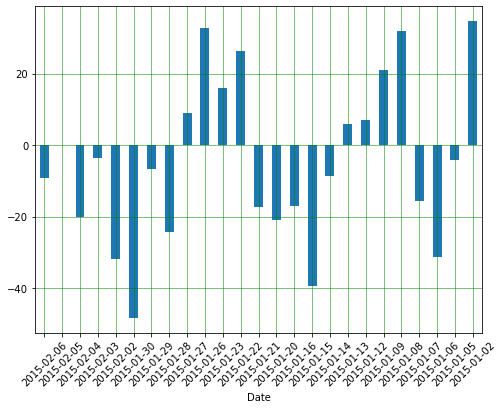

In [37]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Date':dates,'Actual': Y_test, 'Predicted': close_predictions})
df1 = df.tail(25)
 
# set the date with string format for plotting
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
 
df1.set_index('Date',inplace=True)
 
error = df1['Actual'] - df1['Predicted']
 
# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show();

In [38]:
np.linspace(0,1,20) * 10

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])